# ML Week 2 - Exploratory Data Analysis (EDA)
##### Let's attack some heavy-duty archaeological data

##### Note: With bigger files some of these cells can take a few minutes to execute. Be patient ;)

### Datset
We will be using a Zooarchaeology Dataset from several Epipaleolithic - Chalcolithic sites in Anatolia.

The associated publication is:

Arbuckle et al. 2017, https://doi.org/10.34894/WT8CSG

You can download the dataset here (159 Mb):

https://dataverse.nl/dataset.xhtml?persistentId=doi:10.34894/WT8CSG

## Step 1 - Importing Common Packages
##### It's good practice to place all imports in a single cell at the beginning, and add them here as you go. Note that some packages may not be found. In this case, you may need to go to the cluster,

In [8]:
import numpy as np
import pandas as pd
from datetime import datetime
from pyspark.sql.functions import col
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 - Import Data and Examine DataFrame
##### You may also need to join datasets (not shown here)

In [35]:
# Let's read in our data
filepath = "./"  # This can help if the file is in a different folder. Here we just use "./" which means "the file is in this folder"
filename = "EOL-CDC Primary Zooarchaeology data.csv"

# Be sure to specify things like sep, skiprows, decimal+thousands convention, etc.
df_raw = pd.read_csv(filepath + filename)

df_raw.head()

C:\Users\re72fam\AppData\Local\Temp\ipykernel_23996\2076951537.py:6: DtypeWarning: Columns (17,18,19,20,21,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(filepath + filename)


,URI,Label,Project,Project URI,Item Category,Last Updated,Authorship,Latitude (WGS-84),Longitude (WGS-84),Geospatial note,...,Has Biological Taxonomy [Source],Has fusion character [Proximal URI],Has fusion character [Proximal Label],Has fusion character [Proximal Source],Has fusion character [Distal URI],Has fusion character [Distal Label],Has fusion character [Distal Source],Has physiological sex determination [URI],Has physiological sex determination [Label],Has physiological sex determination [Source]
0,http://opencontext.org/subjects/CC80A04F-455E-...,Bone 9290,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-23,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://opencontext.org/subjects/208259AB-BAC9-...,Bone 9291,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-23,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://opencontext.org/subjects/34C7E413-4807-...,Bone 9292,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-22,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://opencontext.org/subjects/43E9607D-106A-...,Bone 9293,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-22,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://opencontext.org/subjects/A61DE94D-CDC1-...,Bone 9294,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-23,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3 - First Bit of Data Wrangling
##### Note that there are a huge number of different steps you may need to do in the data wrangling process. They will vary imensely from one dataset to another. Here are a few common ones which will hopefully help

In [36]:
# Let's see our columns
columns = df_raw.columns
for i in range(len(columns)):
    print(str(i) + ' ' + columns[i])

0 URI
1 Label
2 Project
3 Project URI
4 Item Category
5 Last Updated
6 Authorship
7 Latitude (WGS-84)
8 Longitude (WGS-84)
9 Geospatial note
10 Early Date (BCE/CE)
11 Late Date (BCE/CE)
12 Context URI
13 Context (1)
14 Context (2)
15 Context (3)
16 Context (4)
17 Context (5)
18 Context (6)
19 Context (7)
20 Context (8)
21 Context (9)
22 Has anatomical identification [URI]
23 Has anatomical identification [Label]
24 Has anatomical identification [Source]
25 Has Biological Taxonomy [URI]
26 Has Biological Taxonomy [Label]
27 Has Biological Taxonomy [Source]
28 Has fusion character [Proximal URI]
29 Has fusion character [Proximal Label]
30 Has fusion character [Proximal Source]
31 Has fusion character [Distal URI]
32 Has fusion character [Distal Label]
33 Has fusion character [Distal Source]
34 Has physiological sex determination [URI]
35 Has physiological sex determination [Label]
36 Has physiological sex determination [Source]


In [37]:
columns_to_drop = [df_raw.columns[i] for i in [0,1,2,3,5,6,9,12,22,25,28,25,28,31,34]]
df_raw = df_raw.drop(columns=columns_to_drop)

In [83]:
for column in df_raw.columns:
    print('-------')
    print(column)
    print("Set size: " + str(len(df_raw[column].unique())))
    print(df_raw[column].unique())

-------
Latitude (WGS-84)
Set size: 15
[37.668196   37.84779    37.666389   37.6675     37.33000183 37.077589
 40.267036   37.08335    38.46       37.929167   37.759171   37.35
 40.468303   37.493962   37.49432   ]
-------
Longitude (WGS-84)
Set size: 15
[32.827191   34.611821   32.8225     32.828333   37.04399872 30.5708
 29.602058   30.579436   27.35       27.359444   31.681153   31.933333
 29.309099   33.016928   33.018551  ]
-------
Early Date (BCE/CE)
Set size: 23
[ -6200  -5900  -6100  -7000  -6500  -7400  -7200 -17850 -11900 -12500
 -17840  -6000  -7040  -6750  -7500  -5500  -5600  -5450  -5700  -5800
  -2400  -2700  -6700]
-------
Late Date (BCE/CE)
Set size: 19
[ -6000  -5500  -5800  -5900  -5600  -6500  -6200  -7000 -17050 -11700
 -12100 -10950  -5660  -5700  -6250  -5400  -2000  -2400  -7500]
-------
Context (2)
Set size: 12
['Çatalhöyük' 'Köşk Höyük' 'Domuztepe' 'Karain B Cave' 'Barcın Höyük'
 'Öküzini Cave' 'Ulucak' 'Çukuriçi Höyük' 'Erbaba Höyük' 'Suberde'
 'Ilıpınar' 'Pı

In [39]:
df_raw = df_raw.drop(columns=['Item Category', 'Context (1)', 'Context (6)', 'Context (7)', 'Context (8)'])

In [82]:
length = len(df_raw)

for column in df_raw.columns:
    percent_NaN = df_raw[column].isna().sum()/length*100
    print('-------')
    print(column)
    print(percent_NaN)

-------
Latitude (WGS-84)
0.0
-------
Longitude (WGS-84)
0.0
-------
Early Date (BCE/CE)
0.0
-------
Late Date (BCE/CE)
0.0
-------
Context (2)
0.0
-------
Context (3)
0.0
-------
Context (4)
5.173825839879659
-------
Context (5)
34.273775697810464
-------
Has anatomical identification [Label]
1.3981280294166807
-------
Has anatomical identification [Source]
0.014206919605549057
-------
Has Biological Taxonomy [Label]
2.18076215945178
-------
Has Biological Taxonomy [Source]
0.004596356342971754


In [81]:
columns = df_raw.columns
columns_to_keep = list(columns)[0:-6]
df_raw = df_raw[columns_to_keep]


In [79]:
df_raw = df_raw.drop(columns=["Context (9)"])

In [ ]:
pd.DataFrame({"max":np.max(df_raw, axis = 0), "min":np.min(df_raw, axis=0), "size of set": [len(set(df_raw[col])) for col in df_raw.keys()]})

In [0]:
# If you have a categorical column which you wish to one-hot encode, these lines of code will do it. Here we don't have any categorical columns, so we skip this. Switch to True if you need to use it
categorical_column = False
if categorical_column:
  column_to_one_hot_encode = 'Sorte'  # Which column is categorical?
  sorte_one_hot = pd.get_dummies(df_raw[column_to_one_hot_encode])
  df_raw[sorte_one_hot.keys()] = sorte_one_hot
  df_raw = df_raw.drop(columns=[column_to_one_hot_encode])

## Step 4 - Interpolating NaN values While Maintaining Ordinal/Binary/Categorical Columns
##### NaN values plague many datasets but removing them is not always trivial.

In [0]:
# This handy helper function can identify if a column should contain only a small number of integer entries (typical of binary, ordinal, or categorical columns).
# This will be used below to preserve these qualities of the column after interpolation
def is_col_ordinal(x_set: set) -> bool:
  if len(x_set) > 10:  # If the set is larger than 10 assume that data is likely non-ordinal
    return False
  else:
    for x in x_set:
      if not (isinstance(x,int) or np.isnan(x)):
        return False
  return True

# ==========================
# VERY IMPORTANT NOTE: If you are dealing with a column that contains under 50% NaN values, and these NaN values are not all clustered in one place, but rather reasonably spread out across the column, then it is best practice to try to interpolate. However, if a column contains a huge number of NaNs (more than 50%, although it can depend on application), it is better to drop the column entirely using df.drop(columns="col_name").
# ALSO, obviously, if this is not time-series data, then simple interpolation won't work. If that's the case then use df.dropna() or use SMOTE. Below we take the case in which interpolation is possible
# ==========================

# Interpolate any NaN values (after changing all columns from object-type to numeric)
df = df_raw
tmp_df = pd.DataFrame()  # Without using tmp_df the loop will cause issues
for col in df:
  if col != datetime_column:
    tmp_df[col] = pd.to_numeric(df[col], errors='coerce')
    # If a column is ordinal (or binary) it must be rounded back to int after interpolation
    if is_col_ordinal(set(df[col].dropna())):
      tmp_df[col] = tmp_df[col].interpolate(method="linear")
      tmp_df[col] = np.round(tmp_df[col])
    else:
      tmp_df[col] = tmp_df[col].interpolate(method="linear")
df = tmp_df

## Step 5 - Looking at the Set of Values for Each Column
##### This step lookas the unique values for each column - both maximum, minimum, and sheer number. It is useful as we can infer a number of column properties. Columns which have a set size 2 are almost definitely binary. Colomns with very small set sizes are likely oridnal or categorical. Colomns which have min 0 and max 100 are likely percentages. Note that, if the cell takes too long to run, it's possible there are still NaN values (this can throw off the set function, as it sees each NaN as being different).

In [0]:
pd.DataFrame({"max":np.max(df, axis = 0), "min":np.min(df, axis=0), "size of set": [len(set(df[col])) for col in df.keys()]})

Out[9]:

,max,min,size of set
Presse 8 Chargennummer (F_CV),8286.000000,5321.0,297678
Chargen-Masse Pressinhalt [t] (F_CV),12.191934,0.0,357344
'=48DIRQ63 -- Dichtemessung Schlamm (F_CV),591.389404,0.0,298482
'=48PM01 -- Stellgröße Schlammpumpe 1 (F_CV),100.000000,0.0,211753
'=48PM02 -- Stellgröße Schlammpumpe 2 (F_CV),100.000000,0.0,211794
'=48PIRC07 -- Druckaufnehmer Schlamm (F_CV),20.820312,0.0,328502
'=48FQIRC08 -- Schlammdurchfluss (F_CV),225.028656,0.0,2602
'=48PM03 -- Stellgröße Membranpumpe (F_CV),100.000000,0.0,228414
'=48PIRC15 -- Druckaufnehmer Membrandruck (F_CV),24.194445,0.0,100449
'=48FQIRC08 -- Schlammmenge m³ (F_CV),48.989429,0.0,363442


In [0]:
# Similarly, we can use df.describe() to get more general statistics
df.describe()

Out[10]:

,Presse 8 Chargennummer (F_CV),Chargen-Masse Pressinhalt [t] (F_CV),'=48DIRQ63 -- Dichtemessung Schlamm (F_CV),'=48PM01 -- Stellgröße Schlammpumpe 1 (F_CV),'=48PM02 -- Stellgröße Schlammpumpe 2 (F_CV),'=48PIRC07 -- Druckaufnehmer Schlamm (F_CV),'=48FQIRC08 -- Schlammdurchfluss (F_CV),'=48PM03 -- Stellgröße Membranpumpe (F_CV),'=48PIRC15 -- Druckaufnehmer Membrandruck (F_CV),'=48FQIRC08 -- Schlammmenge m³ (F_CV),'=48PIR24 -- Druckaufnehmer Schließdruck (F_CV),Kurvennummer Membrane (F_CV),'=48FM03 -- Plattentransport (F_CV),Füllzeit in Minuten (F_CV),Filtrationszeit in Minuten (F_CV),Chargenzeit in Minuten (F_CV),Ersatzwert für Dichtemessung in g/l (F_CV),'=48DIRQ63 -- Dichtemessung Ersatzwert (F_CV),Phase: Presse schliessen -> Stand By (F_CV),Phase: Presse befüllen mit Schlamm (F_CV),Phase: Presse Membranpressen aktiv (F_CV),Phase: Presse Ausblasen aktiv (F_CV),Phase: Presse Membrane entleeren aktiv (F_CV),Phase: Presse Abtropfen aktiv (F_CV),Phase: Presse Entleerung aktiv (F_CV)
count,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06,6.324468e+06
mean,6.873135e+03,5.314915e+00,2.986184e+02,8.134960e+00,8.134962e+00,2.883627e+00,9.496528e+00,6.538669e+00,1.106050e+00,1.829450e+01,7.471053e+01,2.132561e+00,1.107119e+00,1.250974e+01,1.994200e+01,2.593188e+01,3.130251e+02,1.086257e-04,2.389244e-02,1.248639e-01,8.776675e-02,3.747825e-03,7.712427e-03,2.052128e-01,8.154330e-02
std,7.737942e+02,4.200402e+00,1.525300e+02,2.349445e+01,2.349443e+01,2.470793e+00,3.371240e+01,2.132427e+01,4.207741e+00,1.449291e+01,1.032044e+02,9.607890e-01,4.481270e-01,1.076823e+01,1.782533e+01,2.689744e+01,1.057306e+01,1.042180e-02,1.527141e-01,3.305646e-01,2.829554e-01,6.110466e-02,8.748112e-02,4.038571e-01,2.736677e-01
min,5.321000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.312000e+03,0.000000e+00,2.450240e+02,0.000000e+00,0.000000e+00,4.626736e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.945000e+03,7.535439e+00,3.065327e+02,0.000000e+00,0.000000e+00,2.482639e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.642880e+01,0.000000e+00,2.000000e+00,1.000000e+00,1.400000e+01,2.108011e+01,2.800000e+01,3.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.425000e+03,8.634212e+00,3.839239e+02,0.000000e+00,0.000000e+00,4.570312e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.068219e+01,1.833984e+02,2.000000e+00,1.000000e+00,2.200000e+01,3.800000e+01,4.600000e+01,3.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,8.286000e+03,1.219193e+01,5.913894e+02,1.000000e+02,1.000000e+02,2.082031e+01,2.250287e+02,1.000000e+02,2.419444e+01,4.898943e+01,3.458203e+02,4.000000e+00,5.000000e+00,1.050000e+02,1.140000e+02,7.130000e+02,3.500000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Step 6 - Visualizations
##### Depending on the data, we may want to visualise it beyond simply statistical measures.

Out[14]:

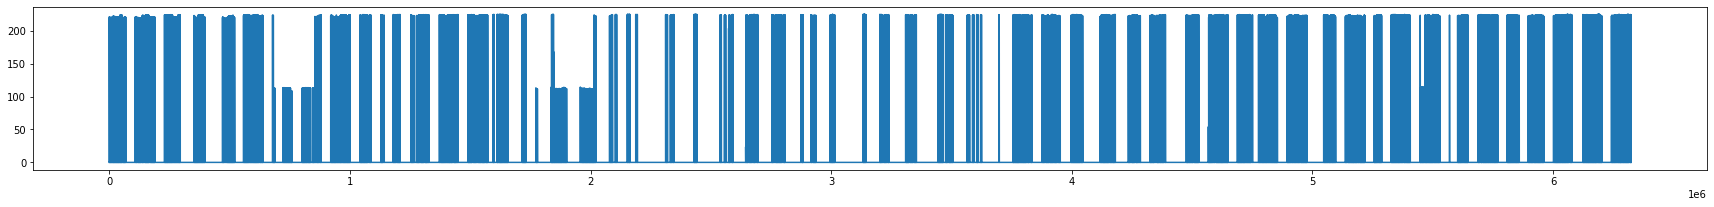

<matplotlib.axes._subplots.AxesSubplot at 0x7f3bdaa7f160>

In [0]:
# We may want to simply see the data over time. You can do this with the following line of code. It can also help to specify the figsize
df["'=48FQIRC08 -- Schlammdurchfluss (F_CV)"].plot(figsize=(30,3))

# Note that, with non time-series data (eg. tabular data), it may make more sense to use a scatter plot

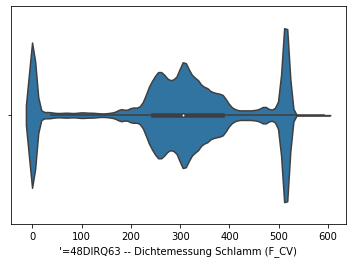

In [0]:
# A violin plot is another interesting way of finding patterns in the data. Below we see an example where most data is clustered between 200 and 500, but interestingly there are lots of values at 0 and 500.
ax = sns.violinplot(x=df["'=48DIRQ63 -- Dichtemessung Schlamm (F_CV)"])

## Step 7 - Moving Averages and Slopes

##### # If we wish to make the data a little less messy, moving averages and slopes can be a powerful tool.

In [0]:
# If we wish to make the data a little less messy, moving averages can be a powerful tool.

# Choose the columns you want to apply this to
cols_to_average = ["'=48FQIRC08 -- Schlammdurchfluss (F_CV)"]

# Then choose the size of the averaging windows you want to use (these will be added to the column names)
moving_average_windows = [100, 1000, 2000]

for col in cols_to_average:
    for moving_average_window in moving_average_windows:
        col_ma = col + "_ma_" + str(moving_average_window)
        #col_dt = col + "_dt_" + str(moving_average_window)
        # create moving average, then shift 1 forward -> moving average of value BEFORE is input for prediction
        df[col_ma] = df[col].rolling(moving_average_window).mean().shift(1).bfill()
        #df[col_dt] = ((df[col] - df[col].shift(moving_average_window))/moving_average_window).bfill()

In [0]:
# You may also want to study the slope (derivative) across your data. Here's some code for that:

# Choose the columns you want to apply this to
cols_to_derivate = ["'=48FQIRC08 -- Schlammdurchfluss (F_CV)"]

# Then choose the size of the averaging windows you want to use (these will be added to the column names)
moving_slope_windows = [10, 100, 500]

for col in cols_to_derivate:
    for moving_slope_window in moving_slope_windows:
        col_dt = col + "_dt_" + str(moving_slope_window)
        # Derivate over the specified range, then bfill
        df[col_dt] = ((df[col] - df[col].shift(moving_slope_window))/moving_slope_window).bfill()

Out[13]:

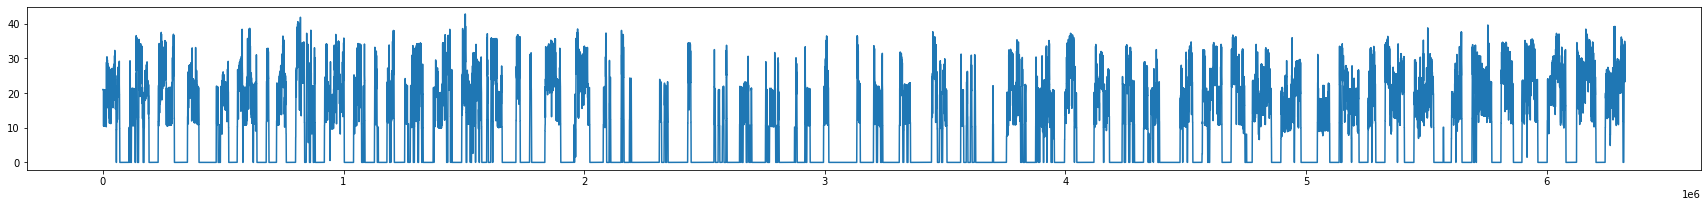

<matplotlib.axes._subplots.AxesSubplot at 0x7f35a9c8f3a0>

In [0]:
# Indeed we can see that the moving average (with a window of 2000) is a little bit more orderly that what we had in the previous step.
# Be sure to choose your window sizes carefully based on the expected periodicity or structure of the data

df["'=48FQIRC08 -- Schlammdurchfluss (F_CV)_ma_2000"].plot(figsize=(30,3))

## Step 8 - Study Correlations and Decide on Feature Importance
##### We can use the seaborne package to study correlations between different features. This can help us pick out columns which either have no correlation to the value to be predicted, or are redundant.
##### Note: As we don't have a target feature here, don't think too much into this specific example. In general, you would want to include features that, in the correlation table, are very dark green or very dark red (they are highly correlated or highly anti-correlated with your target features, meaning they have the most predictive power). But be careful that they should similarly not be "too" correlated. If you have independant features that have a correlation factor of 0.99 or 1 with your target feature, this begs the question of why you are doing ML in the first place (as opposed to just assuming the values of the target feature are always just those of the independant feature).

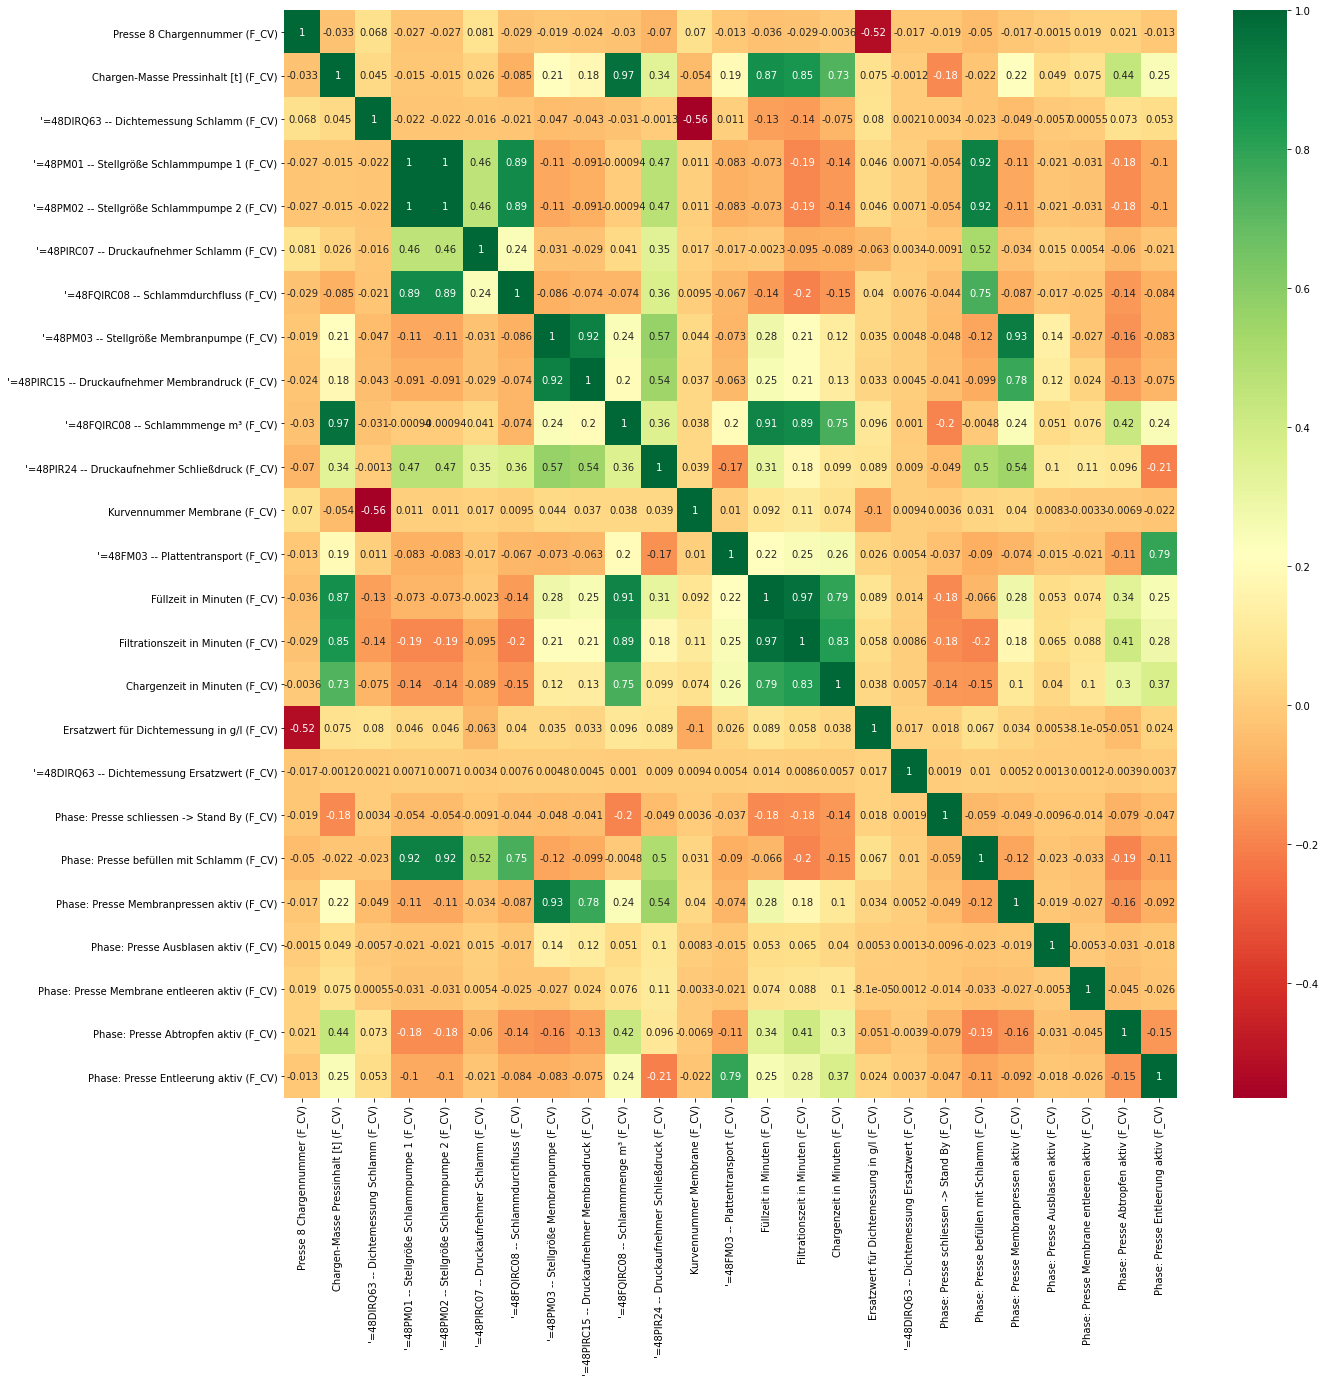

In [0]:
# Get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Step 9 - Drop Useless Columns
##### If some columns are deemed useless, then it's best to drop them earlier than later

In [0]:
cols_to_drop = [
  "Presse 8 Chargennummer (F_CV)",  # This seems to relate to the batch number, which is probably a randomly assigned int not related to the material
  "Kurvennummer Membrane (F_CV)", # Not related to value to be predicted
  "'=48FM03 -- Plattentransport (F_CV)", # Not related to value to be predicted
  "'=48DIRQ63 -- Dichtemessung Ersatzwert (F_CV)",  # All entries in this column are zero
]

df = df.drop(columns=cols_to_drop, errors = 'ignore')

## Step 10 - Save Cleaned Data
##### When you are satisfied with your data wrangling, it's good practice to save a copy of the cleaned dataset to skip pre-processing in future

In [0]:
# This bit will save while conserving the file extension, and adding the cleaned suffix
df.to_csv(path_or_buf=filepath+filename.split('.')[0]+"_cleaned."+filename.split('.')[1])

## Step 11 - Normalize and Split
##### If the data will be used for ML, it's a good idea to split and normalize the data (remember it's only necessary to normalize the features, not the target column).

In [0]:
# Note: this cell will currently not work as we don't actually have a target column (the thing to be predicted) in our dataset
target_column = " "

# Define X (independent features), y (target feature), and then normalize (only X) and split them into test and train sets
X, y = df_lab_raw.drop(columns=[target_column]).to_numpy(), df_lab_raw[target_column].to_numpy()
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Remember that when you normalize only the independent features, it is not necessary to denormalize when making a prediction. This is generally standard practice.

## Step 12 - Actual Data Science
##### With the train and test sets, you are now ready to apply machine learning algorithms based on your use cases. Keep in mind that the above steps are conceived for a standard regression problem. When generalizing to other ML problems (and Data Science problems in general) it is imperative that you go over the steps and rework them for your specific problem.

##### In general, start simple - go for a basic linear model without too many parameters. Than ramp up and test different models. You should also think about hyperparameter tuning, which you can do with the basics offered in sklearn, or with more heavy-duty versions (such as Databricks AutoML), depending on the complexity of the use case.